# Tensorflow Project

Let's take a look at the effectiveness of Neural Nets.

We'll use the Bank Authentication Data Set from the UCI repository.

The data consists of 5 columns:

	•	variance of Wavelet Transformed image (continuous)
	•	skewness of Wavelet Transformed image (continuous)
	•	curtosis of Wavelet Transformed image (continuous)
	•	entropy of image (continuous)
	•	class (integer)

Where class indicates whether or not a Bank Note was authentic.


In [1]:
import pandas as pd

In [21]:
data = pd.read_csv('bank_note_data.csv')
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Exploratory Data Analysis

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

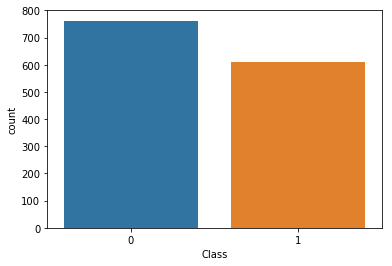

In [36]:
sns.countplot(x = 'Class', data = data)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

/Users/Jayashri/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Jayashri/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/Jayashri/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Jayashri/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs

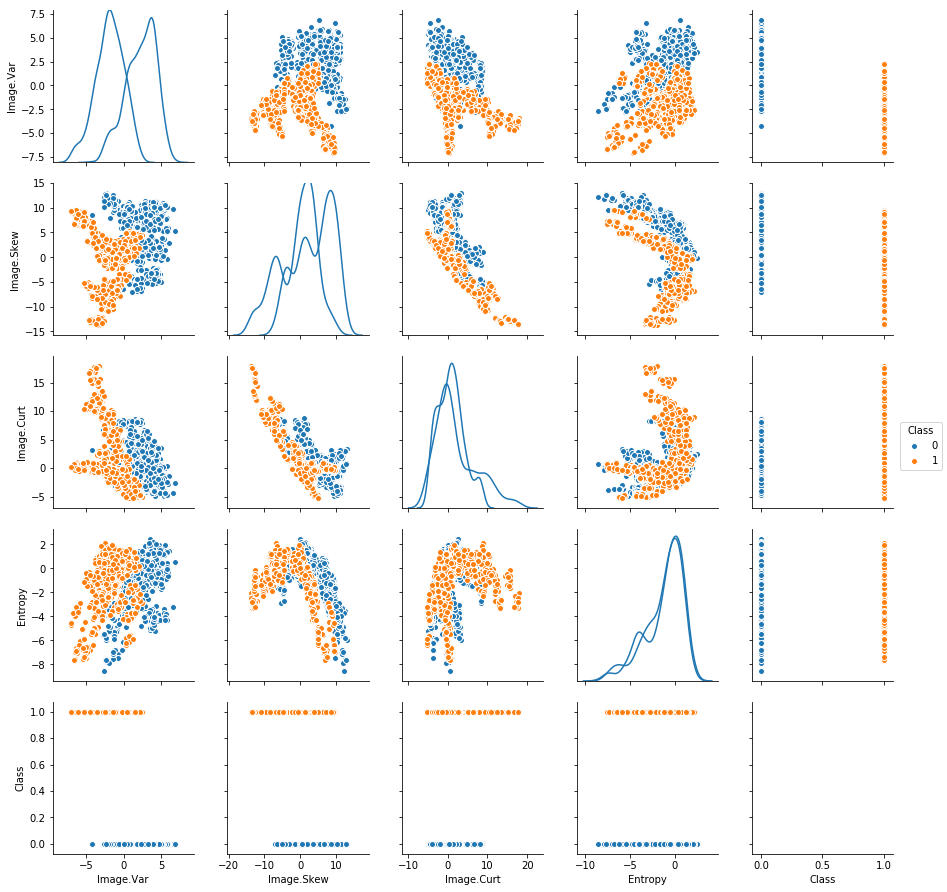

In [37]:
sns.pairplot(data = data, hue ="Class", diag_kind="kde")

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is a good practice to Standardize the data.

### Standard Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [39]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [40]:
scaler.fit(X=data.drop("Class", axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [43]:
scaled_features = scaler.transform(X=data.drop("Class",
                                               axis = 1))
scaled_features

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [51]:
df_feat = pd.DataFrame(data = scaled_features, 
                       columns = data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [56]:
X = df_feat
y = data["Class"]

** Use SciKit Learn to create training and testing sets of the data, using test_size = 30% **

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

# Tensorflow

** Create a list of feature column objects using tf.feature.numeric_column()**

In [61]:
import tensorflow as tf
X.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [70]:
df_feat.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [71]:
image_var = tf.feature_column.numeric_column("Image.Var")
image_skew = tf.feature_column.numeric_column("Image.Skew")
image_curt = tf.feature_column.numeric_column("Image.Curt")
entropy = tf.feature_column.numeric_column("Entropy")

In [73]:
feat_cols=[image_var, image_skew, image_curt, entropy]

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [74]:
classifier = tf.estimator.DNNClassifier(hidden_units = [10,20,10],
                                        n_classes= 2,
                                        feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/lw/sc_sdzmj67jcw7r58sdqrt2r0000gq/T/tmpkq1_q9ob', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a3f7d7fd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Now create a tf.estimator.pandas_input_fn that takes in  X_train, y_train, batch_size and set shuffle=True. Set batch_size parameter to 20. **

In [75]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train,
                                                 y = y_train,
                                                 batch_size = 20,
                                                 shuffle = True)

** Now train classifier to the input function. Use steps=500. **

In [76]:
classifier.train(input_fn=input_func,steps = 500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/lw/sc_sdzmj67jcw7r58sdqrt2r0000gq/T/tmpkq1_q9ob/model.ckpt.
INFO:tensorflow:loss = 14.076602, step = 1
INFO:tensorflow:Saving checkpoints for 48 into /var/folders/lw/sc_sdzmj67jcw7r58sdqrt2r0000gq/T/tmpkq1_q9ob/model.ckpt.
INFO:tensorflow:Loss for final step: 0.38162005.


## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. This one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [77]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                             batch_size = len(X_test),
                                             shuffle = False)

** Use the predict method from the classifier model to create predictions from X_test **

In [78]:
predictions = list(classifier.predict(input_fn = pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/lw/sc_sdzmj67jcw7r58sdqrt2r0000gq/T/tmpkq1_q9ob/model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [79]:
#Let us look at predictions
predictions

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.9935614], dtype=float32),
  'logits': array([5.038985], dtype=float32),
  'probabilities': array([0.0064386, 0.9935614], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.997971], dtype=float32),
  'logits': array([6.198182], dtype=float32),
  'probabilities': array([0.002029, 0.997971], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.00843123], dtype=float32),
  'logits': array([-4.7673454], dtype=float32),
  'probabilities': array([0.99156874, 0.00843123], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.00111933], dtype=float32),
  'logits': array([-6.793903], dtype=float32),
  'probabilities': array([0.9988807 , 0.00111933], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'lo

**It is a dictionay with key 'class_ids' and we want to
get the first value i.e. array[1] or array[0] **

In [82]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])


** Now create a classification report and a Confusion Matrix.**

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(confusion_matrix(y_test, final_preds))

[[224   7]
 [  0 181]]


In [85]:
print(classification_report(y_test, final_preds))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98       231
          1       0.96      1.00      0.98       181

avg / total       0.98      0.98      0.98       412



## Comparison with Random Forest Classifier

** The results from the DNN model seem to be accurate. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier(n_estimators=200)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
rfc_pred = rfc.predict(X_test)

In [97]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       231
          1       0.99      0.99      0.99       181

avg / total       0.99      0.99      0.99       412



In [98]:
print(confusion_matrix(y_test, rfc_pred))

[[229   2]
 [  1 180]]


** It looks like Random Forest Classifier does a very good job too and it is comparable to Deep Neural Networks. **